# Assignment 2

# 1. Import files

In [1]:
import pandas as pd

In [2]:
data_price_demand = pd.read_csv("price_and_demand.csv", header= None)

In [3]:
data_weather = pd.read_csv("weather.csv", encoding='latin1')

# 2. Cleaning Data

## 2.1 Data_weather cleaning

* Check data info to understand what needs to be fixed

In [4]:
data_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Location                           175 non-null    object 
 1   Date                               175 non-null    object 
 2   Minimum temperature (°C)           175 non-null    float64
 3   Maximum temperature (°C)           174 non-null    float64
 4   Rainfall (mm)                      175 non-null    float64
 5   Evaporation (mm)                   0 non-null      float64
 6   Sunshine (hours)                   0 non-null      float64
 7   Direction of maximum wind gust     174 non-null    object 
 8   Speed of maximum wind gust (km/h)  174 non-null    float64
 9   Time of maximum wind gust          174 non-null    object 
 10  9am Temperature (°C)               175 non-null    float64
 11  9am relative humidity (%)          175 non-null    int64  

* 4 Columns have no continous values, we  decided to drop them

In [5]:
data_weather_new = data_weather.drop(columns=["Evaporation (mm)","Sunshine (hours)", "3pm cloud amount (oktas)", "9am cloud amount (oktas)", "Location"])

* Date to date format 

In [6]:
data_weather_new["Date"] = pd.to_datetime(data_weather["Date"], format='%d/%m/%Y')

* Drop row with not full content

In [7]:
data_weather_new[data_weather_new.isna().any(axis=1)]

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
174,2023-04-24,11.0,NaN,0.0,NaN,NaN,NaN,14.3,87,NE,9,1032.5,NaN,NaN,NaN,NaN,NaN


In [8]:
data_weather_new.drop(index =[174], inplace=True)

* We found *"Calm"* is part of the *9am wind speed (km/h) - 2* Columns. According to documentation Calm represents 0

In [9]:

data_weather_new['9am wind speed (km/h) - 2'] = data_weather_new['9am wind speed (km/h)'].replace(['Calm'], 0)
data_weather_new['9am wind speed (km/h) - 2'] = data_weather_new['9am wind speed (km/h) - 2'].astype(float)
data_weather_new['9am relative humidity (%)'] = data_weather_new['9am relative humidity (%)'].astype(float)
data_weather_new.drop(columns=["9am wind speed (km/h)", "Time of maximum wind gust", "9am wind direction", "3pm wind direction", "Direction of maximum wind gust "], inplace=True)


* Final check to ensure all values are valid

In [10]:
data_weather_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               174 non-null    datetime64[ns]
 1   Minimum temperature (°C)           174 non-null    float64       
 2   Maximum temperature (°C)           174 non-null    float64       
 3   Rainfall (mm)                      174 non-null    float64       
 4   Speed of maximum wind gust (km/h)  174 non-null    float64       
 5   9am Temperature (°C)               174 non-null    float64       
 6   9am relative humidity (%)          174 non-null    float64       
 7   9am MSL pressure (hPa)             174 non-null    float64       
 8   3pm Temperature (°C)               174 non-null    float64       
 9   3pm relative humidity (%)          174 non-null    float64       
 10  3pm wind speed (km/h)              174

In [11]:
data_weather_new

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind speed (km/h),3pm MSL pressure (hPa),9am wind speed (km/h) - 2
0,2022-11-01,8.5,13.3,3.0,44.0,12.0,64.0,991.3,13.2,59.0,11.0,991.5,13.0
1,2022-11-02,6.9,15.7,2.8,43.0,11.0,65.0,1006.7,15.1,54.0,13.0,1008.4,9.0
2,2022-11-03,9.1,15.4,0.4,31.0,11.5,70.0,1019.2,13.8,67.0,9.0,1021.3,9.0
3,2022-11-04,10.2,17.8,0.2,24.0,12.3,84.0,1028.1,16.9,56.0,9.0,1026.6,6.0
4,2022-11-05,11.8,22.7,0.0,31.0,14.0,78.0,1026.3,18.8,65.0,11.0,1023.2,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2023-04-19,14.4,17.5,1.2,28.0,14.8,66.0,1022.0,15.8,53.0,9.0,1022.1,9.0
170,2023-04-20,7.8,18.5,0.0,17.0,12.4,72.0,1026.8,17.5,58.0,4.0,1025.5,7.0
171,2023-04-21,11.3,19.0,0.0,13.0,14.8,78.0,1030.5,18.6,64.0,2.0,1029.2,6.0
172,2023-04-22,14.6,19.2,0.0,22.0,15.2,84.0,1031.9,18.8,64.0,11.0,1029.7,6.0


## 2.2 Price_demand cleaning 

* Check data info to understand what needs to be fixed

In [12]:
data_price_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8352 entries, 0 to 8351
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8352 non-null   object 
 1   1       8352 non-null   object 
 2   2       8352 non-null   float64
 3   3       8352 non-null   float64
 4   4       8352 non-null   object 
dtypes: float64(2), object(3)
memory usage: 326.4+ KB


* Data does not count with header so we create headers on columns.

In [13]:
column_names = ["Area","Date", "Demand", "Price", "Name"]
data_price_demand.columns = column_names

* Drop unnecessary columns from data.

In [14]:
data_price_demand.drop(columns=["Area", "Name"], inplace= True)

* Analyse data based on time. Extract date information in a separate columns.

In [15]:
from datetime import datetime

data_price_demand["Date"] = pd.to_datetime(data_price_demand["Date"], format='%d/%m/%Y %H:%M')

data_price_demand["Hour"] = data_price_demand["Date"].dt.hour
data_price_demand["Minute"] = data_price_demand["Date"].dt.minute
data_price_demand["Month"] = data_price_demand["Date"].dt.month
data_price_demand["Quarter"] = data_price_demand["Date"].dt.quarter
data_price_demand["Day"] = data_price_demand["Date"].dt.day

* Set Date as index and resample data to get highest demand per day. Create new dataframe with this data.

In [16]:
data_price_demand.set_index('Date', inplace=True)
result_df = data_price_demand["Demand"].resample('D').max()
result = pd.DataFrame(result_df)
result.reset_index(inplace=True)

In [17]:
group = result.set_index("Demand")
group
me_data = pd.merge(group, data_price_demand, left_index=True, right_on='Demand', how="inner")

* Create new dataframe with new columns and drop the unnecessary values

In [18]:
merg_data = me_data
merg_data.columns = ['Short Date', 'Demand', 'Price','Hour', 'Minute', 'Month', 'Quarter', 'Day']
merg_data.reset_index(inplace=True)
merg_data.drop([20, 87, 107, 134, 135, 146], axis=0, inplace=True)


* We check for negative data of below 0. However we decided to leave it intact as this is common for this type of date and we might skewed our results. 

In [19]:
data_price_demand

,Demand,Price,Hour,Minute,Month,Quarter,Day
Date,,,,,,,
2022-11-01 00:30:00,4178.18,8.94,0,30,11,4,1
2022-11-01 01:00:00,4086.02,0.14,1,0,11,4,1
2022-11-01 01:30:00,4033.37,0.02,1,30,11,4,1
2022-11-01 02:00:00,3985.64,0.00,2,0,11,4,1
2022-11-01 02:30:00,3885.64,0.02,2,30,11,4,1
...,...,...,...,...,...,...,...
2023-04-23 22:00:00,4717.55,84.09,22,0,4,2,23
2023-04-23 22:30:00,4520.39,81.25,22,30,4,2,23
2023-04-23 23:00:00,4472.49,93.97,23,0,4,2,23


* Final check to ensure all values are valid

In [20]:
data_price_demand.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8352 entries, 2022-11-01 00:30:00 to 2023-04-24 00:00:00
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Demand   8352 non-null   float64
 1   Price    8352 non-null   float64
 2   Hour     8352 non-null   int64  
 3   Minute   8352 non-null   int64  
 4   Month    8352 non-null   int64  
 5   Quarter  8352 non-null   int64  
 6   Day      8352 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 522.0 KB


* Merged data to be analyse

In [21]:
data_weather_new.set_index("Date", inplace=True)
merg_data.set_index("Short Date",inplace=True)
merged_data = pd.merge(merg_data, data_weather_new, left_index=True, right_on='Date')
merged_data.rename(columns = {'Date':'DATE', "Price":"RRP", "Demand":"Total Demand"}, inplace = True)
merged_data.drop(columns=["DATE"], inplace=True)

* Save final clean data to analyse

In [22]:
merged_data.to_csv("merged_data.csv")

In [23]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 174 entries, 2022-11-01 to 2023-04-23
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total Demand                       174 non-null    float64
 1   RRP                                174 non-null    float64
 2   Hour                               174 non-null    int64  
 3   Minute                             174 non-null    int64  
 4   Month                              174 non-null    int64  
 5   Quarter                            174 non-null    int64  
 6   Day                                174 non-null    int64  
 7   Minimum temperature (°C)           174 non-null    float64
 8   Maximum temperature (°C)           174 non-null    float64
 9   Rainfall (mm)                      174 non-null    float64
 10  Speed of maximum wind gust (km/h)  174 non-null    float64
 11  9am Temperature (°C)               174 

# 3 Pre - Analysis 

## 3.1 Data_price_demand

* Use Seaborn to find correlations in data_price_demand data

<function matplotlib.pyplot.show(close=None, block=None)>

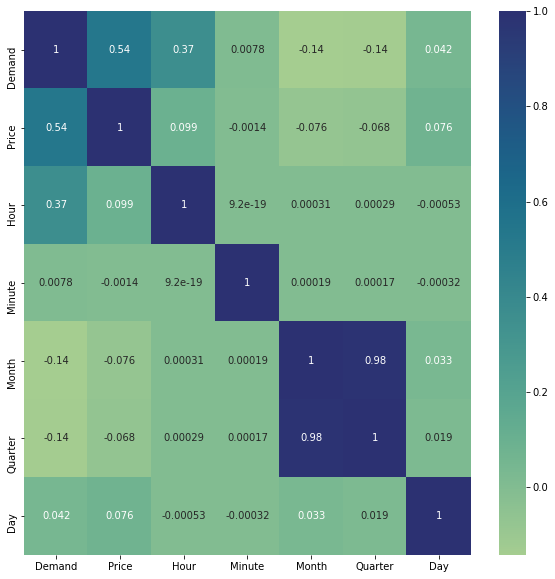

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
features0 = ["Price", "Demand"]
plt.figure(figsize=(10,10))
sns.heatmap(data_price_demand.corr(),annot=True,cmap='crest')
plt.show

* Use scatter plot to derive conclusions from data. Demand is highest in the months of Dec, Jan, and Feb which matches with the summer time in Australia. 

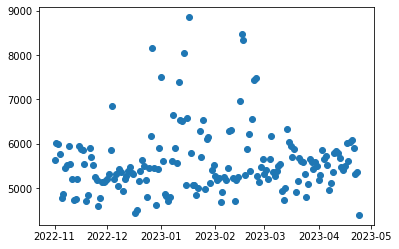

In [25]:
plt.scatter(x=result['Date'], y=result['Demand'])

* Demand is highest during the afternoon after 6pm. Duck shape graph is obtained 

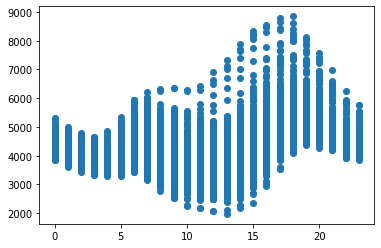

In [26]:
plt.scatter(x=data_price_demand['Hour'], y=data_price_demand['Demand'])

* Demand is highest in the months of Dec, Jan, and Feb which matches with the summer period in Australia. 

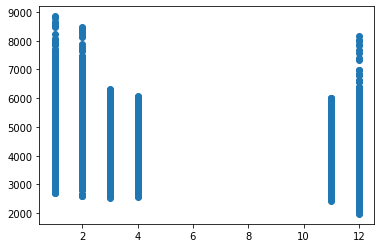

In [27]:
plt.scatter(x=data_price_demand['Month'], y=data_price_demand['Demand'])

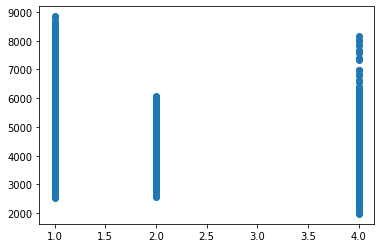

In [28]:
plt.scatter(x=data_price_demand['Quarter'], y=data_price_demand['Demand'])

## 3.2 Data weather

* Use Seaborn to find correlations in weather_demand_new data

<function matplotlib.pyplot.show(close=None, block=None)>

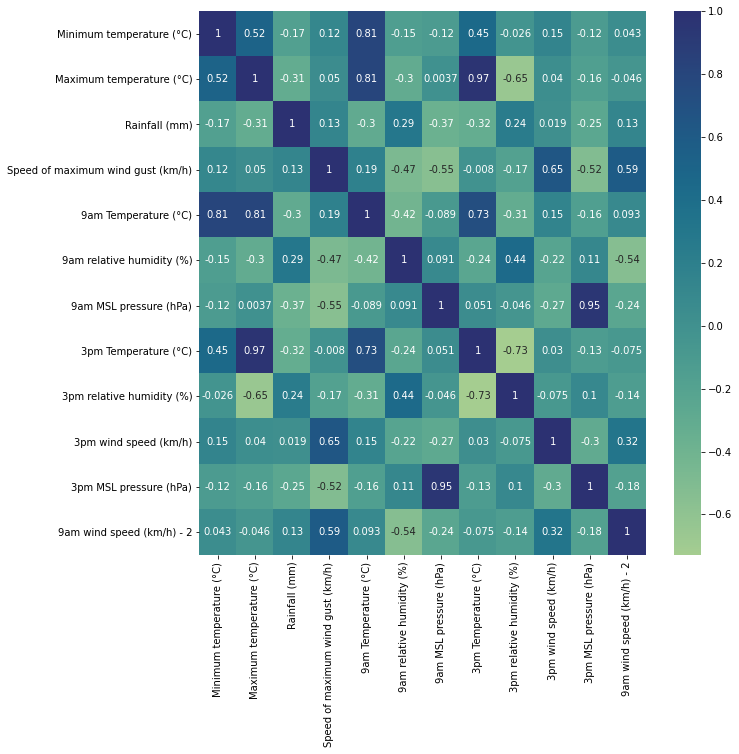

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(data_weather_new.corr(),annot=True,cmap='crest')
plt.show

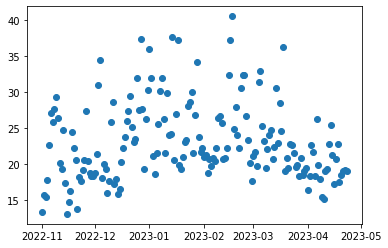

In [30]:
data_weather_new.reset_index(inplace=True)
plt.scatter(x=data_weather_new['Date'], y=data_weather_new['Maximum temperature (°C)'])

* Use scatter plot to derive conclusions from data. Demand is highest in the months of Dec, Jan, and Feb which matches with the summer time in Australia. 

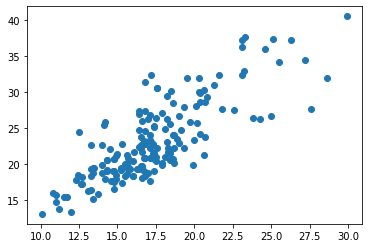

In [31]:
plt.scatter(x=data_weather_new['9am Temperature (°C)'], y=data_weather_new['Maximum temperature (°C)'])

* Check the direction of relationship between features and their distribution in one graph

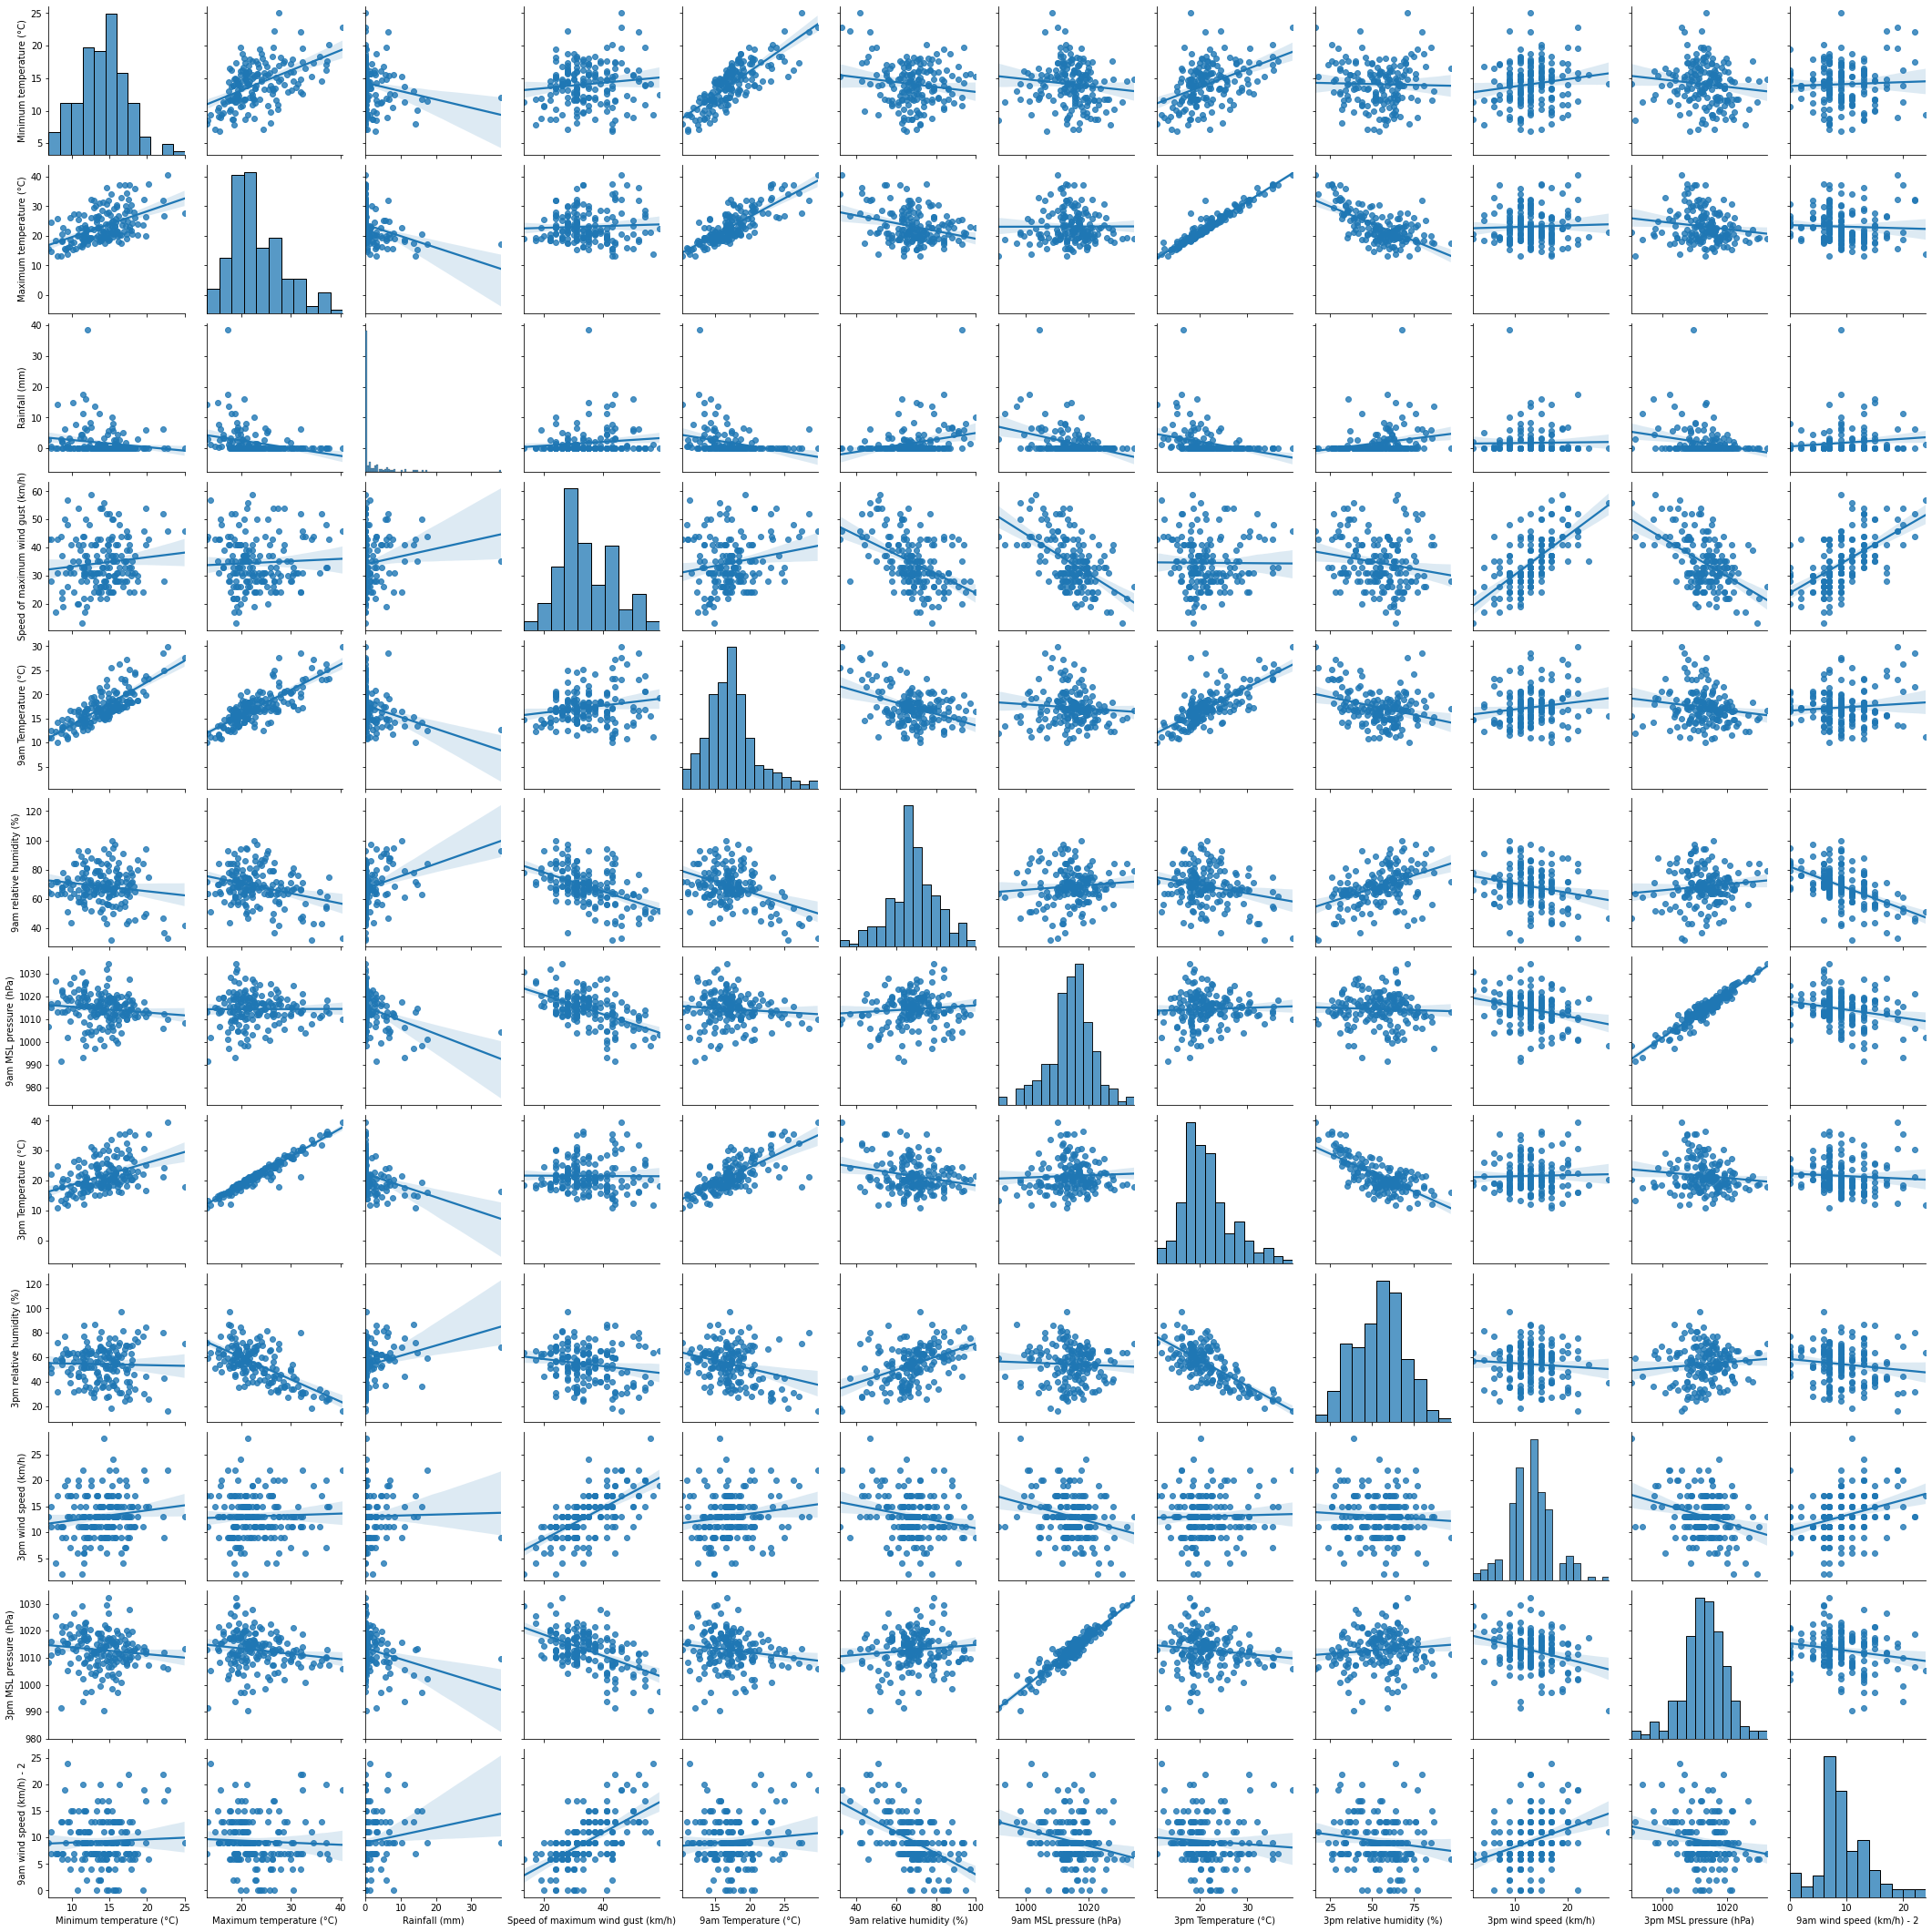

In [32]:
sns.pairplot(data_weather_new, kind="reg")

## 3.3 Merged data

<function matplotlib.pyplot.show(close=None, block=None)>

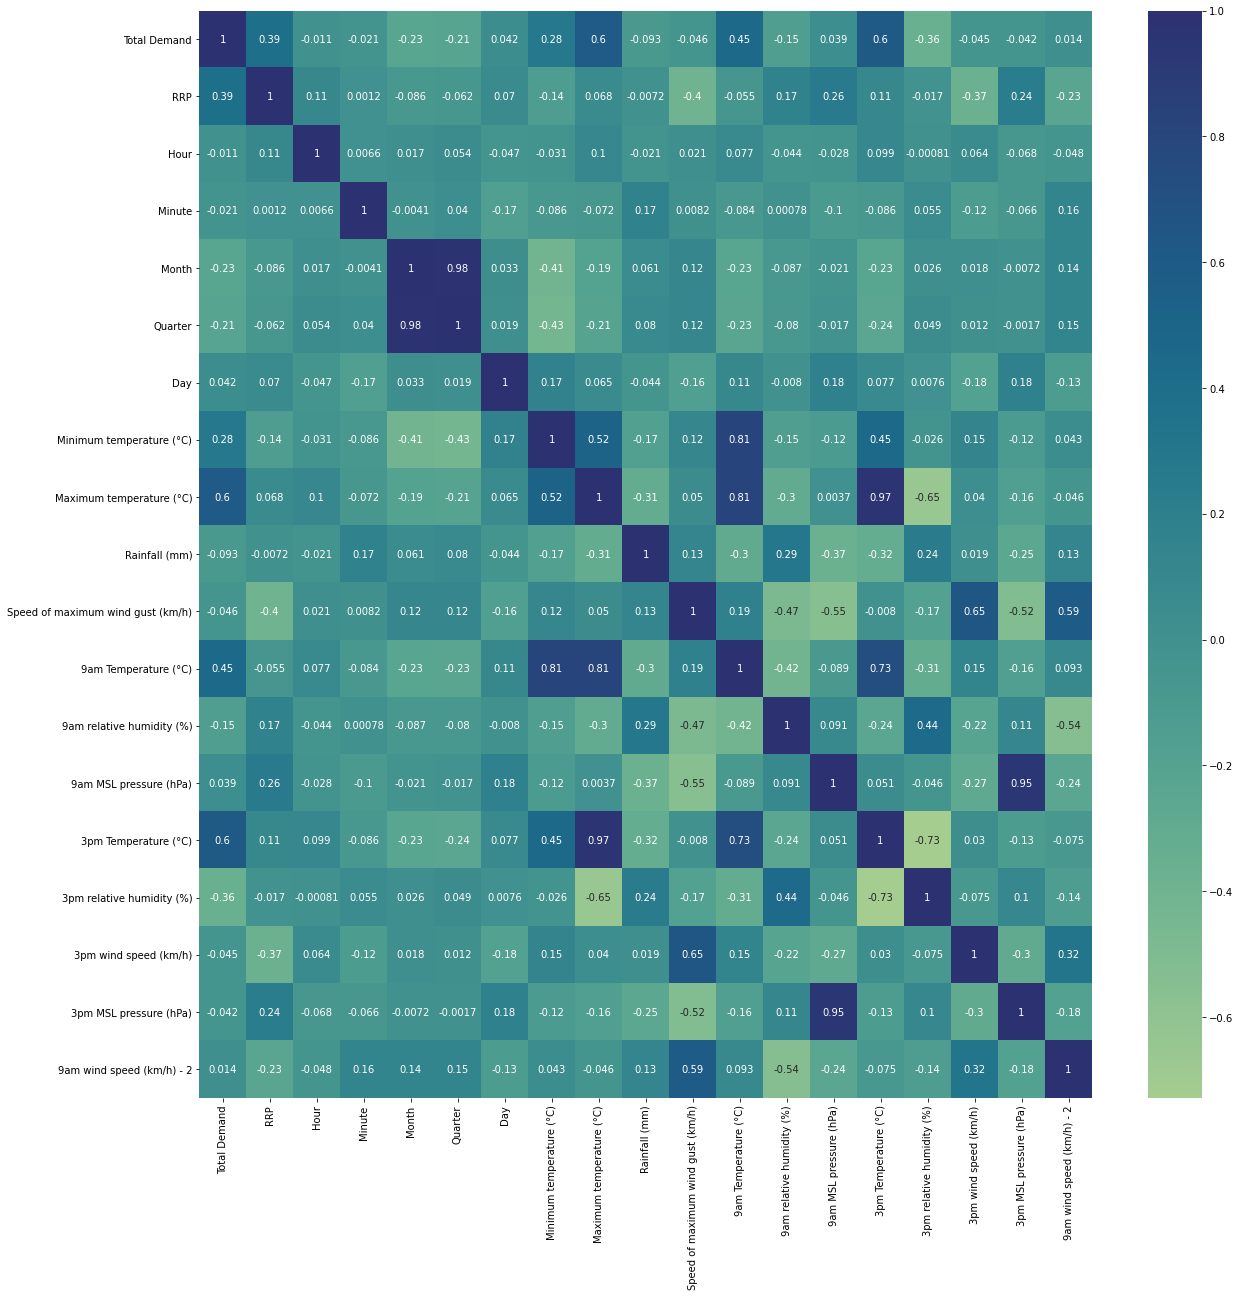

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(merged_data.corr(),annot=True,cmap='crest')
plt.show



* Regression plot showing relationship directions for most features

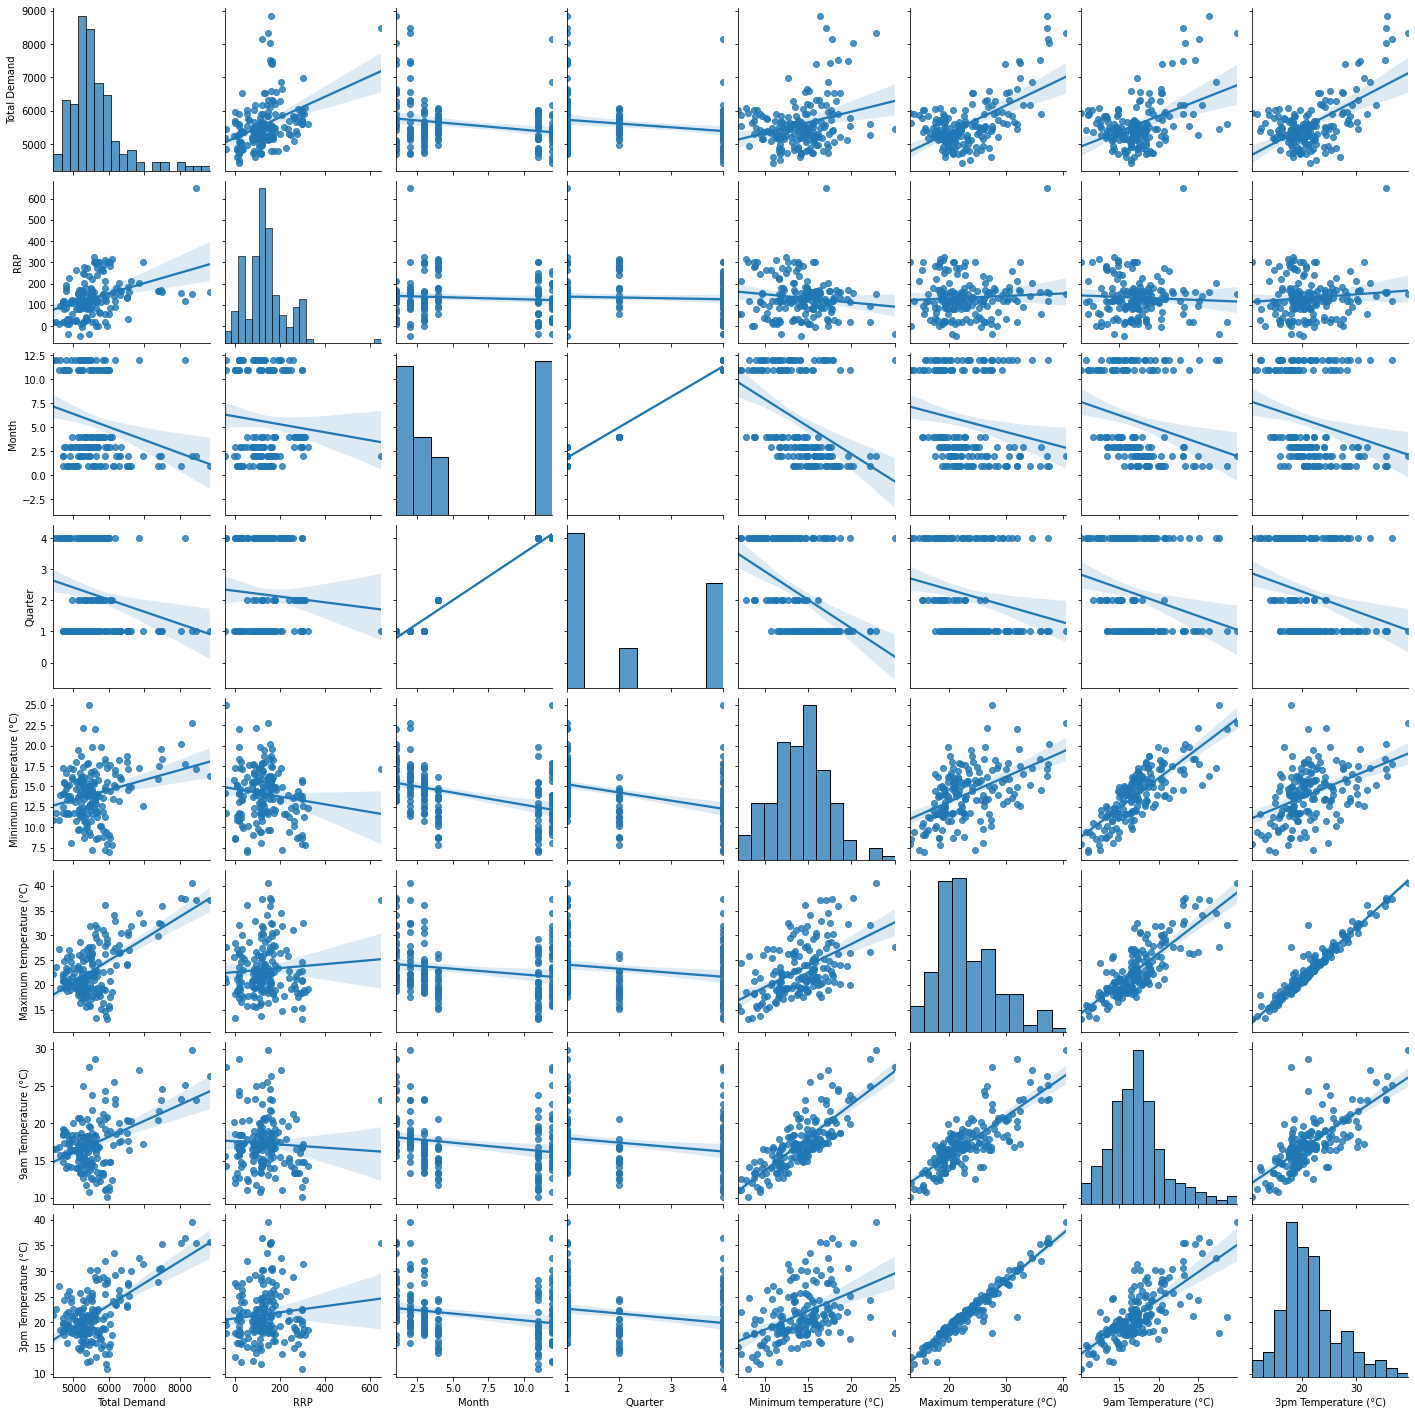

In [229]:
features00 = ['Total Demand', 'RRP', 'Month', 'Quarter', 'Minimum temperature (°C)', 'Maximum temperature (°C)','9am Temperature (°C)', '3pm Temperature (°C)']
sns.pairplot(merged_data[features00], kind="reg")

# 4 Machine learning analysis

1. Feature selection (manual)

In [323]:
selected_features0= ['RRP', 'Hour', 'Minute', 'Month', 'Quarter', 'Day',
       'Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)',
       'Speed of maximum wind gust (km/h)', '9am Temperature (°C)',
       '9am relative humidity (%)', '9am MSL pressure (hPa)',
       '3pm Temperature (°C)', '3pm relative humidity (%)',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)',
       '9am wind speed (km/h) - 2']
    
selected_features1 =    ['Minimum temperature (°C)',
     'Maximum temperature (°C)',
       'Rainfall (mm)',
       '9am relative humidity (%)',
        '9am wind speed (km/h) - 2', 
       '9am MSL pressure (hPa)',
       '3pm relative humidity (%)',
       '3pm wind speed (km/h)',
       '3pm MSL pressure (hPa)',
       '9am Temperature (°C)', 
        '3pm Temperature (°C)']        

selected_features2 =    ['Minimum temperature (°C)',
     'Maximum temperature (°C)',
        'RRP',
       '9am Temperature (°C)', 
        '3pm Temperature (°C)']  


selected_features3 =    ['Minimum temperature (°C)',
     'Maximum temperature (°C)',
        'RRP',
       '9am Temperature (°C)', 
        '3pm Temperature (°C)',
                        'Hour']  

selected_features4= ['RRP', 'Day',
       'Minimum temperature (°C)', 'Maximum temperature (°C)', 
        '9am Temperature (°C)',
        '9am MSL pressure (hPa)',
       '3pm Temperature (°C)', 
       '9am wind speed (km/h) - 2']

selected_features5 =    ['Minimum temperature (°C)',
     'Maximum temperature (°C)',
        'RRP',
       '9am Temperature (°C)', 
        '3pm Temperature (°C)',
                        'Hour',
                        'Rainfall (mm)','Speed of maximum wind gust (km/h)',
                        '3pm relative humidity (%)', '9am relative humidity (%)',
                        '9am wind speed (km/h) - 2']  




In [36]:
merged_data.columns

Index(['Total Demand', 'RRP', 'Hour', 'Minute', 'Month', 'Quarter', 'Day',
       'Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)',
       'Speed of maximum wind gust (km/h)', '9am Temperature (°C)',
       '9am relative humidity (%)', '9am MSL pressure (hPa)',
       '3pm Temperature (°C)', '3pm relative humidity (%)',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)',
       '9am wind speed (km/h) - 2'],
      dtype='object')

In [324]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from six import StringIO
from IPython.display import Image
import sys
!{sys.executable} -m pip install pydotplus
import pydotplus
import graphviz
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, neighbors, impute
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from graphviz import Source
from IPython.display import SVG

## 4.1 Reggression

### 4.1.1 Linear Regression

Mean Absolute Error: 525.6427208375808
Root Mean Squared Error: 673.3806912177708
R2 score: 0.4791515496284705


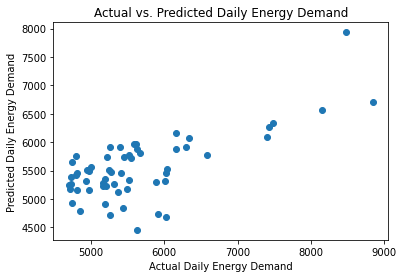

In [802]:
# Select features and target variable

features0 = merged_data[selected_features0]
features1 = merged_data[selected_features1]
features2 = merged_data[selected_features2]
features3 = merged_data[selected_features3]
features4 = merged_data[selected_features4]
features5 = merged_data[selected_features5]

target = merged_data['Total Demand']  # Use 'Demand' as the target variable

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features5, target, test_size=0.33, random_state=43)


# Instantiate
feature_selector = SelectKBest(mutual_info_regression, k=5)
# Perform selection
X_train = feature_selector.fit_transform(X_train, y_train)
X_test = feature_selector.transform(X_test)

pca = PCA(n_components=5) # Features are linear independant
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)




# Choose and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred)
print("R2 score:", r2_score(y_test, y_pred))
plt.xlabel('Actual Daily Energy Demand')
plt.ylabel('Predicted Daily Energy Demand')
plt.title('Actual vs. Predicted Daily Energy Demand')
plt.show()





## Testing of results 

In [803]:
repeat = 100

r2_values = []
rmse_values = []
mae_values = []

for reps in range(repeat): 
    #Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features5, target, test_size=0.33, random_state=reps)


#     # Instantiate
#     feature_selector = SelectKBest(mutual_info_regression, k=4)
#     # Perform selection
#     X_train = feature_selector.fit_transform(X_train, y_train)
#     X_test = feature_selector.transform(X_test)

#     pca = PCA(n_components=4) # Features are linear independant
#     X_train = pca.fit_transform(X_train)
#     X_test = pca.transform(X_test)




    # Choose and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
   
    r2_values.append(r2)
    rmse_values.append(rmse)
    mae_values.append(mae)
    
mean_r2 = np.mean(r2_values)
mean_rmse = np.mean(rmse_values)
mean_mae = np.mean(mae_values)


results_dict_lin_reg = {
    'Mean R-squared': mean_r2,
    'Mean RMSE': mean_rmse,
    'Mean MAE': mean_mae
}

print("LINEAR REGRESSION RESULTS")
for key, value in results_dict_lin_reg.items():
    print(key, ":", value)

LINEAR REGRESSION RESULTS
Mean R-squared : 0.42138012665315777
Mean RMSE : 547.4775128201579
Mean MAE : 420.48355943466095


## 4.1.2 Decision Tree Regressor

Mean Absolute Error: 449.2619394934568
Root Mean Squared Error: 577.6064254906947
R2 score: 0.6167747732634472


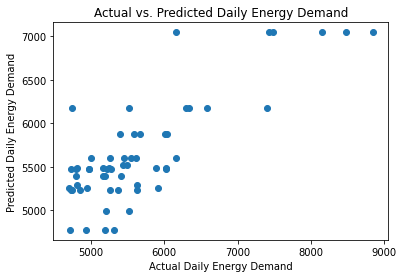

In [804]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features2, target, test_size=0.33, random_state=43)

# Instantiate
feature_selector = SelectKBest(mutual_info_regression, k=5)
# Perform selection
X_train = feature_selector.fit_transform(X_train, y_train)
X_test = feature_selector.transform(X_test)

pca = PCA(n_components=5) # Features are linear independant
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

model2 = DecisionTreeRegressor(min_samples_leaf=6, random_state=43)

# model2 = DecisionTreeRegressor(random_state=43, max_depth=3)
model2.fit(X_train, y_train)

# Make predictions
y_pred = model2.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)


# Plot actual vs. predicted values
plt.scatter(y_test, y_pred)
print("R2 score:", r2_score(y_test, y_pred))
plt.xlabel('Actual Daily Energy Demand')
plt.ylabel('Predicted Daily Energy Demand')
plt.title('Actual vs. Predicted Daily Energy Demand')
plt.show()

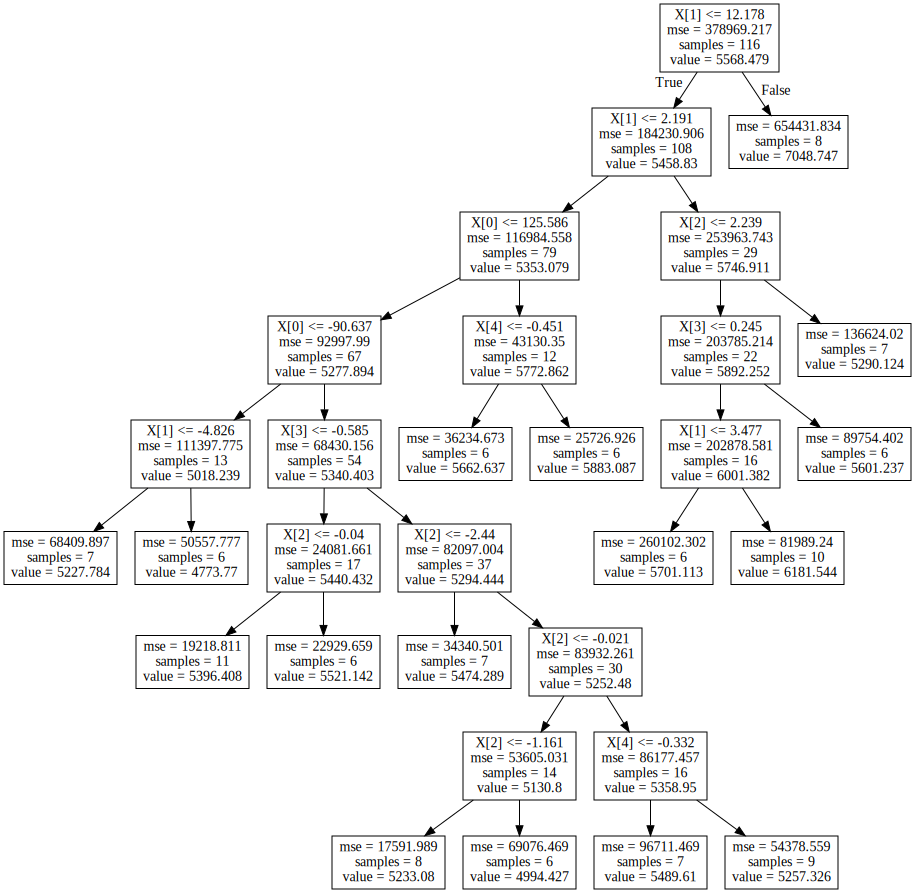

In [805]:
graph = Source(tree.export_graphviz(model2, out_file=None))
SVG(graph.pipe(format='svg'))

## Testing of results 

In [806]:
repeat = 100

r2_values = []
rmse_values = []
mae_values = []



for reps in range(repeat): 
    X_train, X_test, y_train, y_test = train_test_split(features2, target, test_size=0.33, random_state=reps)

#     # Instantiate:
#     feature_selector = SelectKBest(mutual_info_regression, k=3)
#     # Perform selection
#     X_train = feature_selector.fit_transform(X_train, y_train)
#     X_test = feature_selector.transform(X_test)

#     pca = PCA(n_components=3) # Features are linear independant
#     X_train = pca.fit_transform(X_train)
#     X_test = pca.transform(X_test)




    model2 = DecisionTreeRegressor(min_samples_leaf=6)
    model2.fit(X_train, y_train)

    # Make predictions
    y_pred = model2.predict(X_test)

    # Evaluate model performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)



#     print("R2 score:", r2_score(y_test, y_pred))
    r2_values.append(r2)
    rmse_values.append(rmse)
    mae_values.append(mae)
#     graph = Source(tree.export_graphviz(model2, out_file=None))
#     SVG(graph.pipe(format='svg'))


mean_r2 = np.mean(r2_values)
mean_rmse = np.mean(rmse_values)
mean_mae = np.mean(mae_values)


results_dict = {
    'Mean R-squared': mean_r2,
    'Mean RMSE': mean_rmse,
    'Mean MAE': mean_mae
}

print("DECISION TREE REGRESSOR RESULTS")
for key, value in results_dict.items():
    print(key, ":", value)



DECISION TREE REGRESSOR RESULTS
Mean R-squared : 0.46832418713200286
Mean RMSE : 523.4971884318009
Mean MAE : 389.11197544789013


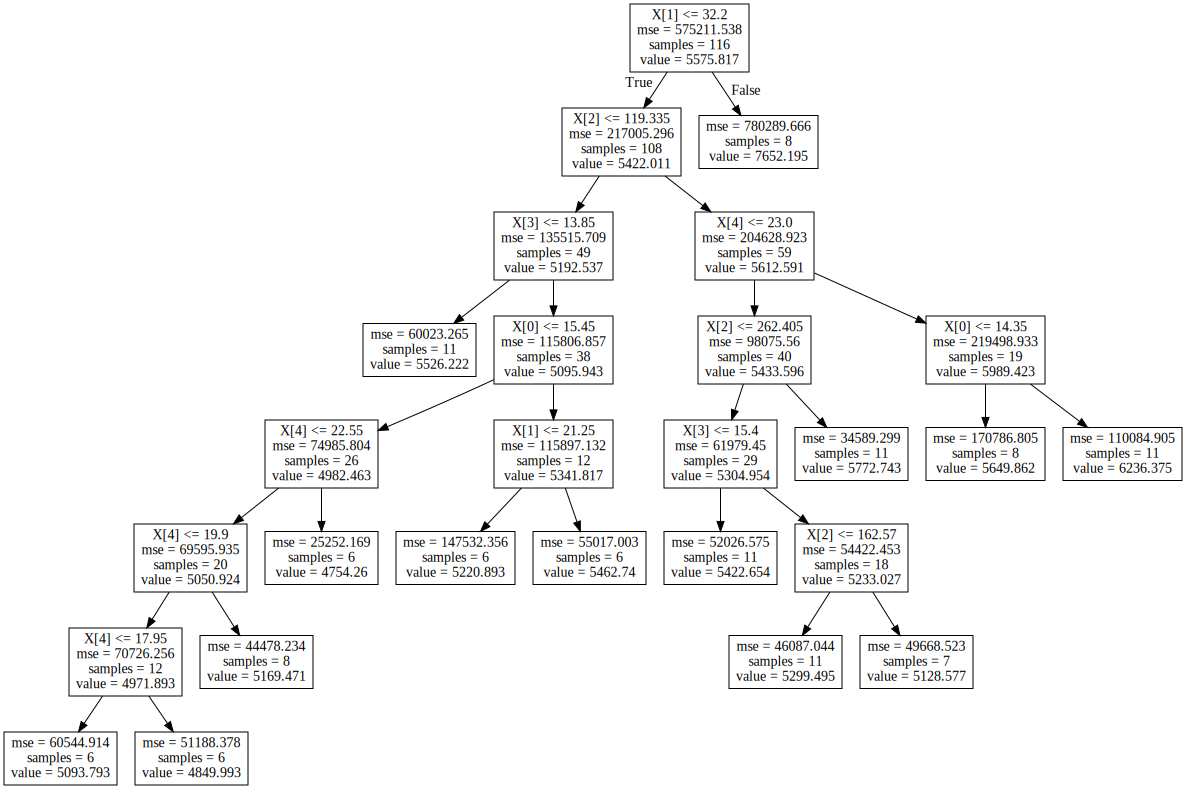

In [784]:
graph = Source(tree.export_graphviz(model2, out_file=None))
SVG(graph.pipe(format='svg'))

## 4.1.3 KNeighborsRegressor

Mean Absolute Error: 473.2959655172413
Root Mean Squared Error: 698.5583294662584
R2 score: 0.4394744556639011


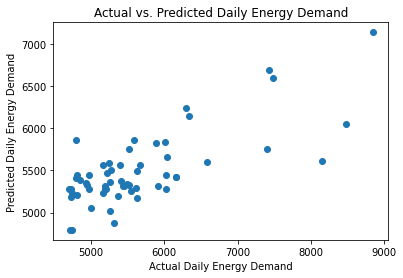

In [726]:
X_train, X_test, y_train, y_test = train_test_split(features2, target, test_size=0.33, random_state=43)

# Instantiate
feature_selector = SelectKBest(mutual_info_regression, k=5)
# Perform selection
X_train = feature_selector.fit_transform(X_train, y_train)
X_test = feature_selector.transform(X_test)

pca = PCA(n_components=5) # Features are linear independant
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


# Choose and train the KNeighborsRegressor model
model3 = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
model3.fit(X_train, y_train)

# Make predictions
y_pred = model3.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)


# Plot actual vs. predicted values
plt.scatter(y_test, y_pred)
print("R2 score:", r2_score(y_test, y_pred))
plt.xlabel('Actual Daily Energy Demand')
plt.ylabel('Predicted Daily Energy Demand')
plt.title('Actual vs. Predicted Daily Energy Demand')
plt.show()

## Testing results

In [727]:
repeat = 100

r2_values = []
rmse_values = []
mae_values = []


for reps in range(repeat): 
    X_train, X_test, y_train, y_test = train_test_split(features2, target, test_size=0.33, random_state=reps)




    # Instantiate
    feature_selector = SelectKBest(mutual_info_regression, k=5)
    # Perform selection
    X_train = feature_selector.fit_transform(X_train, y_train)
    X_test = feature_selector.transform(X_test)

    pca = PCA(n_components=5) # Features are linear independant
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)




    # Choose and train the KNeighborsRegressor model
    model3 = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
    model3.fit(X_train, y_train)

    # Make predictions
    y_pred = model3.predict(X_test)
    # Evaluate model performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    r2_values.append(r2)
    rmse_values.append(rmse)
    mae_values.append(mae)

mean_r2 = np.mean(r2_values)
mean_rmse = np.mean(rmse_values)
mean_mae = np.mean(mae_values)


results_dict_knereg = {
    'Mean R-squared': mean_r2,
    'Mean RMSE': mean_rmse,
    'Mean MAE': mean_mae
}

print("KNEIGHBORSREGRESSOR RESULTS")
for key, value in results_dict_knereg.items():
    print(key, ":", value)




KNEIGHBORSREGRESSOR RESULTS
Mean R-squared : 0.4311849826671961
Mean RMSE : 550.0460278699512
Mean MAE : 396.63493448275864


## 4.2 Classification

* Bin data for classification

In [431]:
df = pd.DataFrame()

# Define the number of bins you want for each feature
num_bins_demand = 3  ## KEep as 3 for ML Model
# Create bin labels
bin_labels_demand = [f'Demand Bin {i}' for i in range(1, num_bins_demand+1)]
# qcut
qbins = 3
df['Total Demand'] = pd.qcut(merged_data['Total Demand'],qbins, labels= bin_labels_demand)
df['Demand number'] = merged_data['Total Demand']



### 4.2.1 kneighbors

#### 4.2.1.1 kneighbors (Own features selection)

Accuracy score: 0.7


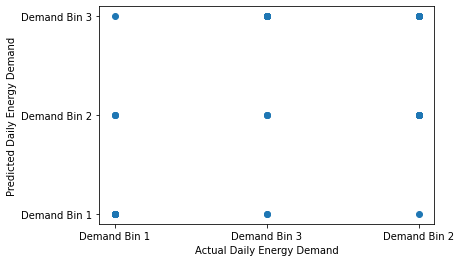

In [696]:
target2 = df['Total Demand']
X_train, X_test, y_train, y_test = train_test_split(features3,
                                                    target2, 
                                                    train_size=0.66,  # 0.66 ML modeelling 
                                                    random_state=43) # 42 ML modeelling

scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred=knn.predict(X_test)

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred)

print("Accuracy score:", accuracy_score(y_test, y_pred))
plt.xlabel('Actual Daily Energy Demand')
plt.ylabel('Predicted Daily Energy Demand')
# plt.title('Actual vs. Predicted Daily Energy Demand')
plt.show()

## Testing results

In [690]:
repeat = 100

accuracy_sc = []


for reps in range(repeat): 

    X_train, X_test, y_train, y_test = train_test_split(features3,
                                                        target2, 
                                                        train_size=0.66,  # 0.66 ML modeelling 
                                                        random_state=reps) # 42 ML modeelling

    scaler = preprocessing.MinMaxScaler().fit(X_train)
    X_train=scaler.transform(X_train)
    X_test=scaler.transform(X_test)

    knn = neighbors.KNeighborsClassifier(n_neighbors=6)

    knn.fit(X_train, y_train)

    y_pred=knn.predict(X_test)
    
    acc =  accuracy_score(y_test, y_pred)
    
    accuracy_sc.append(acc)
    
mean_accuracy = np.mean(accuracy_sc)
    
results_dict_kneigh = {
    'Accuracy Score': mean_accuracy,
}

print("KNEIGHBORSCLASSIFICATION RESULTS")
for key, value in results_dict_kneigh.items():
    print(key, ":", value)


KNEIGHBORSCLASSIFICATION RESULTS
Accuracy Score : 0.6033333333333334


#### 4.2.1.2 k fold kneighbors

In [689]:
data = features3

classlabel = target2
k=100
kf = KFold(n_splits=k, shuffle=True)
acc_score = []
for train_index, test_index in kf.split(data):
    #Perform the split for this fold
    X_train, X_test = data.iloc[train_index, :], data.iloc[test_index, :]
    y_train, y_test = classlabel[train_index], classlabel[test_index]

    #Scale the data
#     scaler = preprocessing.StandardScaler().fit(X_train)
    scaler = preprocessing.MinMaxScaler().fit(X_train)
    X_train=scaler.transform(X_train)
    X_test=scaler.transform(X_test)

    #Impute missing values via mean imputation
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    X_train = imp.fit_transform(X_train)
    X_test = imp.transform(X_test)
    
#     # Instantiate
#     feature_selector = SelectKBest(mutual_info_classif, k=4)
#     # Perform selection
#     X_train = feature_selector.fit_transform(X_train, y_train)
#     X_test = feature_selector.transform(X_test)

#     pca = PCA(n_components=4) # Features are linear independant
#     X_train = pca.fit_transform(X_train)
#     X_test = pca.transform(X_test)
    
    #Train k-nn classifier
    knn = neighbors.KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)

    #Predict result
    y_pred=knn.predict(X_test)
    acc_score.append(accuracy_score(y_test, y_pred))


#Display average of accuracy scores
avg_acc_score = sum(acc_score)/k
print(avg_acc_score)





0.6


### 4.2.2 Decision Tree Classifier

#### 4.2.2.1 Decision Tree Classifier (Own features selection)

Accuracy score: 0.6333333333333333


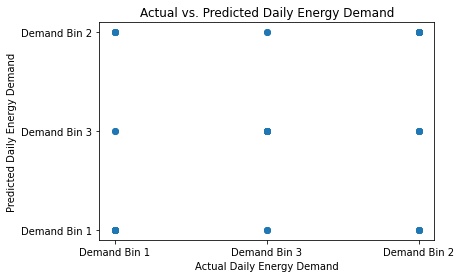

In [807]:
X_train, X_test, y_train, y_test = train_test_split(features3,
                                                    target2, 
                                                    train_size=0.66, 
                                                    test_size=0.34,
                                                   random_state = 43)

#scaler = preprocessing.StandardScaler().fit(X_train)
scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

#extensionation give criteria to decision tree

dt = DecisionTreeClassifier(criterion="entropy",random_state=43, max_depth=3, min_samples_leaf=15) # Criteria low entropy # stochastic different # Max_depth = inmportant to decide branching of deicison tree

# # Instantiate
# feature_selector = SelectKBest(mutual_info_classif, k=5)
# # Perform selection
# X_train = feature_selector.fit_transform(X_train, y_train)
# X_test = feature_selector.transform(X_test)

# pca = PCA(n_components=5) # Features are linear independant
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

dt.fit(X_train, y_train)

y_pred=dt.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred))

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Daily Energy Demand')
plt.ylabel('Predicted Daily Energy Demand')
plt.title('Actual vs. Predicted Daily Energy Demand')
plt.show()





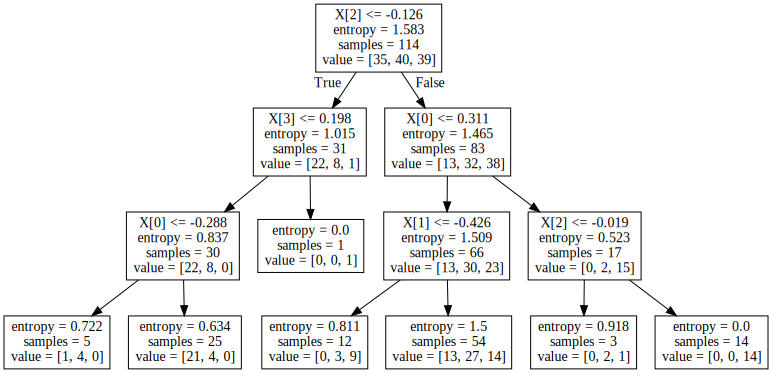

In [634]:
graph = Source(tree.export_graphviz(dt, out_file=None))
SVG(graph.pipe(format='svg'))

## Testing results

Accuracy Score : 0.5443333333333333


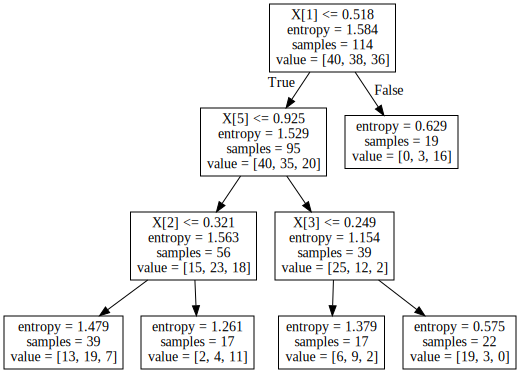

In [808]:
repeat = 100

accuracy_sc = []


for reps in range(repeat): 

    X_train, X_test, y_train, y_test = train_test_split(features3,
                                                        target2, 
                                                        train_size=0.66, 
                                                       random_state=reps)

#     scaler = preprocessing.StandardScaler().fit(X_train)
    scaler = preprocessing.MinMaxScaler().fit(X_train)
    X_train=scaler.transform(X_train)
    X_test=scaler.transform(X_test)

    #extensionation give criteria to decision tree

    dt = DecisionTreeClassifier(criterion="entropy",random_state=reps, max_depth=3, min_samples_leaf=15)
#         

#     # Instantiate
#     feature_selector = SelectKBest(mutual_info_classif, k=3)
#     # Perform selection
#     X_train = feature_selector.fit_transform(X_train, y_train)
#     X_test = feature_selector.transform(X_test)

#     pca = PCA(n_components=3) # Features are linear independant
#     X_train = pca.fit_transform(X_train)
#     X_test = pca.transform(X_test)

    dt.fit(X_train, y_train)

    y_pred=dt.predict(X_test)
    
    acc =  accuracy_score(y_test, y_pred)
    
    accuracy_sc.append(acc)
    
mean_accuracy = np.mean(accuracy_sc)
    
results_dict_dectreeclass = {
    'Accuracy Score': mean_accuracy,
}

for key, value in results_dict_dectreeclass.items():
    print(key, ":", value)
    
    


graph = Source(tree.export_graphviz(dt, out_file=None))
SVG(graph.pipe(format='svg'))







#### 4.2.2 Decision Tree Classifier kfold

0.5733333333333335


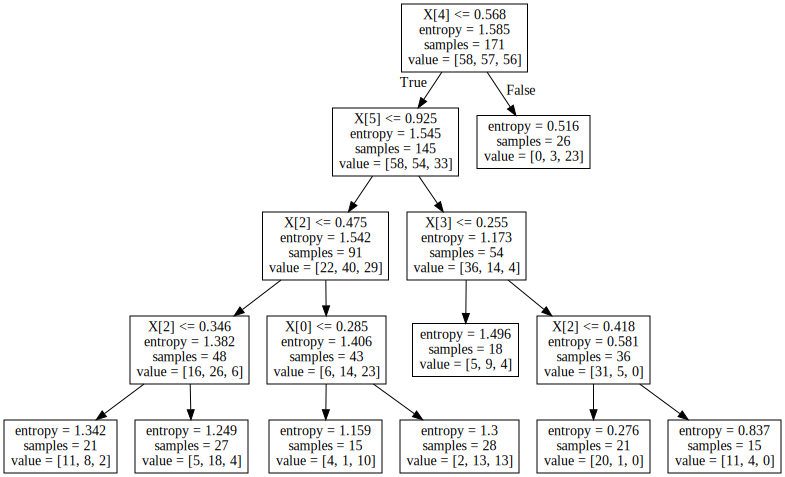

In [809]:
data = features3

classlabel = target2
k=50
kf = KFold(n_splits=k, shuffle=True)
acc_score = []
for train_index, test_index in kf.split(data):
    #Perform the split for this fold
    X_train, X_test = data.iloc[train_index, :], data.iloc[test_index, :]
    y_train, y_test = classlabel[train_index], classlabel[test_index]

    #Scale the data
#     scaler = preprocessing.StandardScaler().fit(X_train)
    scaler = preprocessing.MinMaxScaler().fit(X_train)
    X_train=scaler.transform(X_train)
    X_test=scaler.transform(X_test)

    #Impute missing values via mean imputation
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    X_train = imp.fit_transform(X_train)
    X_test = imp.transform(X_test)
    
#     # Instantiate
#     feature_selector = SelectKBest(mutual_info_classif, k=4)
#     # Perform selection
#     X_train = feature_selector.fit_transform(X_train, y_train)
#     X_test = feature_selector.transform(X_test)

#     pca = PCA(n_components=4) # Features are linear independant
#     X_train = pca.fit_transform(X_train)
#     X_test = pca.transform(X_test)
    
    dt = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_leaf=15) # Criteria low entropy # stochastic different # Max_depth = inmportant to decide branching of deicison tree
    dt.fit(X_train, y_train)

    y_pred=dt.predict(X_test)
    acc_score.append(accuracy_score(y_test, y_pred))
avg_acc_score = sum(acc_score)/k
print(avg_acc_score)
    
graph = Source(tree.export_graphviz(dt, out_file=None))
SVG(graph.pipe(format='svg'))
    
